Saving VRSU-3.avif to VRSU-3.avif


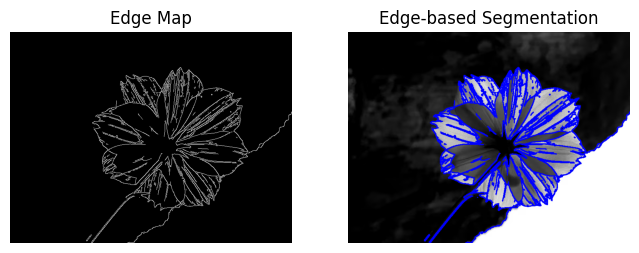

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path, 0)

if img is None:
    raise ValueError("Failed to load image!")

edges = cv2.Canny(img, 100, 200)

contours, _ = cv2.findContours(
    edges,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

segmented = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

cv2.drawContours(segmented, contours, -1, (0, 0, 255), 2)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Edge Map")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Edge-based Segmentation")
plt.imshow(segmented, cmap='gray')
plt.axis("off")

plt.show()


Saving i2.jpg to i2.jpg


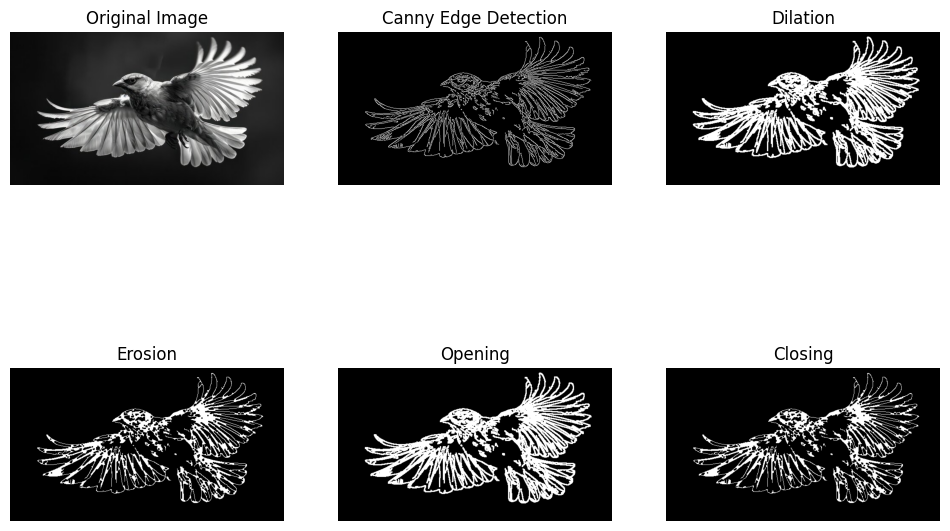

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path, 0)
img_1 = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(img, 100, 200)

kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(edges, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)
opening = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Dilation")
plt.imshow(dilated, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Erosion")
plt.imshow(eroded, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Opening")
plt.imshow(opening, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Closing")
plt.imshow(closing, cmap="gray")
plt.axis("off")

plt.show()
